# Iris Flower - Batch Prediction


In this notebook we will, 

1. Load the batch inference data that arrived in the last 24 hours
2. Predict the first Iris Flower found in the batch
3. Write the ouput png of the Iris flower predicted, to be displayed in Github Pages.

In [1]:
import pandas as pd
import hopsworks
import joblib

project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/398
Connected. Call `.close()` to terminate connection gracefully.


In [2]:
mr = project.get_model_registry()
model = mr.get_model("iris", version=1)
model_dir = model.download()
model = joblib.load(model_dir + "/iris_model.pkl")

Connected. Call `.close()` to terminate connection gracefully.

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [3]:
feature_view = fs.get_feature_view(name="iris", version=1)

Now we will do some **Batch Inference**. 

We will read all the input features that have arrived in the last 24 hours, and score them.

In [4]:
import datetime
from PIL import Image

batch_data = feature_view.get_batch_data()

y_pred = model.predict(batch_data)

y_pred

2022-09-22 22:57:48,356 INFO: USE `dowlingj_featurestore`
2022-09-22 22:57:49,322 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`
FROM `dowlingj_featurestore`.`iris_1` `fg0`


array(['Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa',
       'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Virginica', 'Virginica', 'Setosa',
       'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Setosa', 'Virginica', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Versicol

In [5]:
batch_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.700000,3.800000,1.700000,0.300000
1,5.600000,2.700000,4.200000,1.300000
2,6.300000,3.300000,6.000000,2.500000
3,6.000000,2.900000,4.500000,1.500000
4,5.000000,3.000000,1.600000,0.200000
...,...,...,...,...
145,6.200000,2.800000,4.800000,1.800000
146,6.500000,3.000000,5.500000,1.800000
147,6.400000,2.800000,5.600000,2.100000
148,5.000000,3.400000,1.600000,0.400000


Batch prediction output is the last entry in the batch - it is output as a file 'latest_iris.png'

In [6]:
flower = y_pred[y_pred.size-1]
flower_img = "assets/" + flower + ".png"
img = Image.open(flower_img)            

img.save("../../assets/latest_iris.png")

In [7]:
iris_fg = fs.get_feature_group(name="iris", version=1)
df = iris_fg.read()
df

2022-09-22 22:57:52,953 INFO: USE `dowlingj_featurestore`
2022-09-22 22:57:53,996 INFO: SELECT `fg0`.`sepal_length` `sepal_length`, `fg0`.`sepal_width` `sepal_width`, `fg0`.`petal_length` `petal_length`, `fg0`.`petal_width` `petal_width`, `fg0`.`variety` `variety`
FROM `dowlingj_featurestore`.`iris_1` `fg0`


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.700000,3.800000,1.700000,0.300000,Setosa
1,5.600000,2.700000,4.200000,1.300000,Versicolor
2,6.300000,3.300000,6.000000,2.500000,Virginica
3,6.000000,2.900000,4.500000,1.500000,Versicolor
4,5.000000,3.000000,1.600000,0.200000,Setosa
...,...,...,...,...,...
145,6.200000,2.800000,4.800000,1.800000,Virginica
146,6.500000,3.000000,5.500000,1.800000,Virginica
147,6.400000,2.800000,5.600000,2.100000,Virginica
148,5.000000,3.400000,1.600000,0.400000,Setosa


In [8]:
label = df.iloc[-1]["variety"]
label

'Setosa'

In [9]:
label_flower = "assets/" + label + ".png"

img = Image.open(label_flower)            

img.save("../../assets/actual_iris.png")

In [10]:
import pandas as pd

monitor_fg = fs.get_or_create_feature_group(name="iris_predictions",
                                  version=1,
                                  primary_key=["datetime"],
                                  description="Iris flower Prediction/Outcome Monitoring"
                                 )

In [11]:
from datetime import datetime
now = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")

data = {
    'prediction': [flower],
    'label': [label],
    'datetime': [now],
}
monitor_df = pd.DataFrame(data)
monitor_fg.insert(monitor_df)

Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/398/jobs/named/iris_predictions_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x7f6df00beb50>, None)

In [12]:
history_df = monitor_fg.read()
history_df

2022-09-22 22:58:56,479 INFO: USE `dowlingj_featurestore`
2022-09-22 22:58:57,592 INFO: SELECT `fg0`.`prediction` `prediction`, `fg0`.`label` `label`, `fg0`.`datetime` `datetime`
FROM `dowlingj_featurestore`.`iris_predictions_1` `fg0`


,prediction,label,datetime
0,Virginica,Virginica,"09/22/2022, 12:13:48"
1,Setosa,Virginica,"09/22/2022, 12:24:21"
2,Virginica,Virginica,"09/22/2022, 12:25:11"
3,Versicolor,Virginica,"09/22/2022, 12:27:05"
4,Setosa,Versicolor,"09/22/2022, 10:30:26"
5,Virginica,Versicolor,"09/22/2022, 11:16:34"
6,Virginica,Versicolor,"09/22/2022, 11:25:26"
7,Setosa,Virginica,"09/22/2022, 11:30:19"
8,Virginica,Setosa,"09/22/2022, 11:36:58"
9,Virginica,Virginica,"09/22/2022, 11:43:46"


In [13]:
# import dataframe_image as dfi

# df_recent = history_df.tail(5)
 
# # If you exclude this image, you may have the same iris_latest.png and iris_actual.png files
# # If no files have changed, the GH-action 'git commit/push' stage fails, failing your GH action (last step)
# # This image, however, is always new, ensuring git commit/push will succeed.
# dfi.export(df_recent, '../../assets/df_recent.png')

In [14]:
from sklearn.metrics import confusion_matrix

predictions = history_df[['prediction']]
labels = history_df[['label']]

results = confusion_matrix(labels, predictions)
print(results)

[[1 1 1]
 [2 1 2]
 [2 2 3]]


In [15]:
predictions

,prediction
0,Virginica
1,Setosa
2,Virginica
3,Versicolor
4,Setosa
5,Virginica
6,Virginica
7,Setosa
8,Virginica
9,Virginica


In [16]:
from matplotlib import pyplot
import seaborn as sns

df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

df_cm

,Pred Setosa,Pred Versicolor,Pred Virginica
True Setosa,1,1,1
True Versicolor,2,1,2
True Virginica,2,2,3


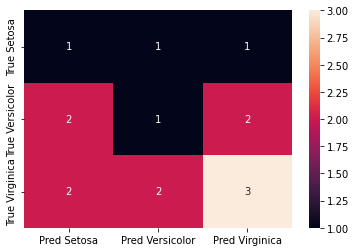

In [17]:
cm = sns.heatmap(df_cm, annot=True)

fig = cm.get_figure()
fig.savefig("../../assets/confusion_matrix.png") 

In [26]:
X = batch_data.iloc[-1:]
y = label

In [27]:
X

,sepal_length,sepal_width,petal_length,petal_width
149,4.678443,2.599973,1.773838,0.610118


In [30]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot


results = permutation_importance(model, X, y, scoring='accuracy')

importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

ValueError: Found input variables with inconsistent numbers of samples: [6, 1]